In [1]:
!conda env list

# conda environments:
#
base                     C:\Users\Benya\anaconda3
prj                   *  C:\Users\Benya\anaconda3\envs\prj



In [2]:
import os
import dotenv
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.append('../../src/transforms')
from resizer import ImageResizer

In [3]:
DATA_DIR = dotenv.get_key(dotenv.find_dotenv(), "DATA_DIR")
TARGET_DIR = dotenv.get_key(dotenv.find_dotenv(), "TARGET_DIR")
FOLDERS = ['0_N', '1_PB', '2_UDH', '3_FEA', '4_ADH', '5_DCIS', '6_IC']
SPLITS = ['train', 'val', 'test']

In [4]:
def load_image(infilename) :
    img = Image.open(infilename)
    img.load()
    return img

In [5]:
def split_image_into_patches(image, patch_size):
    width, height = image.size
    patches = []
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            box = (x, y, x + patch_size, y + patch_size)
            patch = image.crop(box)
            patches.append(patch)
    return patches
    

In [6]:
def get_new_dimensions(width : int, height : int, patch_height : int = 224, patch_width : int = 224):
    width_coef = int(np.round(width / patch_width).astype(np.int32))
    height_coef = int(np.round(height / patch_height).astype(np.int32))

    new_width = width_coef * patch_width
    new_height = height_coef * patch_height

    return new_width, new_height

In [21]:
test = load_image("D:\\AIDS\\S2\\Project\\Dataset\\BRACS_RoI\\latest_version\\test\\0_N\\BRACS_264_N_11.png")
width, height = test.size
new_width, new_height = get_new_dimensions(width, height, 224, 224)
print(new_width, new_height)
patches = split_image_into_patches(test, 224)
print(len(patches))

1792 1344
48


In [17]:
def plot_patches(patches):
    num_patches = len(patches)
    num_cols = 5  # Number of columns in the grid
    num_rows = (num_patches + num_cols - 1) // num_cols  # Calculate number of rows required
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    for i, ax in enumerate(axes.flat):
        if i < num_patches:
            ax.imshow(patches[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

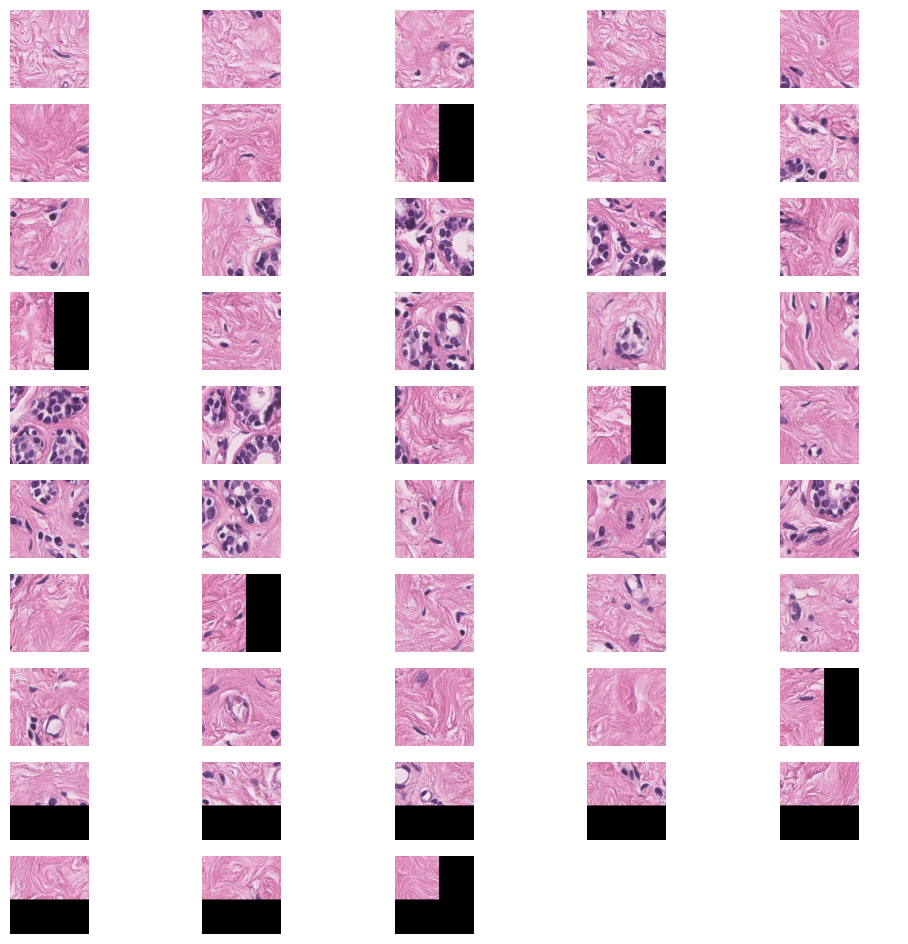

In [18]:
plot_patches(patches)

In [15]:
for split in SPLITS:
        for folder in FOLDERS:
            print(f"Processing {split} {folder}")
            folder_path = os.path.join(DATA_DIR, split, folder)
            target_folder_path = os.path.join(TARGET_DIR, split, folder)
            os.makedirs(target_folder_path, exist_ok=True)
            for file in os.listdir(folder_path):
                img = Image.open(os.path.join(folder_path, file))
                patches = split_image_into_patches(img, 224)
                for i, patch in enumerate(patches):
                    patch.save(os.path.join(target_folder_path, f"{file.split('.')[0]}_{i}.png"))

Processing train 0_N


TypeError: Cannot handle this data type: (1, 1, 224, 3), <i4